 Ridge Regression Results:
R² Score: 0.875
RMSE: 1.552


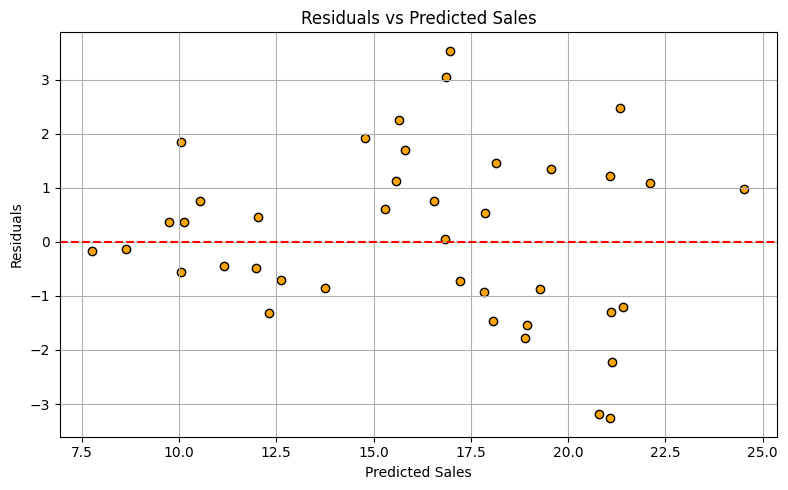


Predicted Sales for new budget: 17.12


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("advertising.csv")
df['Avg_Spend'] = (df['TV'] + df['Radio'] + df['Newspaper']) / 3
X = df[['TV', 'Radio', 'Newspaper', 'Avg_Spend']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f" Ridge Regression Results:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='orange', edgecolor='black')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
new_input = pd.DataFrame({
    'TV': [180],
    'Radio': [25],
    'Newspaper': [15]
})
new_input['Avg_Spend'] = (new_input['TV'] + new_input['Radio'] + new_input['Newspaper']) / 3
new_prediction = model.predict(new_input)[0]
print(f"\nPredicted Sales for new budget: {new_prediction:.2f}")